<a href="https://colab.research.google.com/github/Abdullah-Al-Pias/Bangla-Multiclass-Text-Classification/blob/main/BanglaMCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import pandas
import pandas as pd

# reading csv file
train = pd.read_csv("/content/drive/MyDrive/BJIT/BanglaMCT7/train.csv")
test = pd.read_csv("/content/drive/MyDrive/BJIT/BanglaMCT7/test.csv")

Import Libraries


In [13]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re

from nltk import word_tokenize


Show Train Data

In [4]:
train.head()

,category,text,cleanText
0,economy,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সং...
1,sports,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবা...
2,international,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের উত্তর প্...
3,state,নারায়ণগঞ্জের সোনারগাঁ উপজেলার একটি সরকারি প্র...,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকা...
4,sports,"‘ছাই থেকে ছাই, ধুলো থেকে ধুলো...’ আধ্যাত্মিক ক...",ছাই ছাই ধুলো ধুলো আধ্যাত্মিক ...


Show Test Data

In [6]:
test.head()

,category,text,cleanText
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...
4,technology,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...


Drop the raw text data from the training set

In [7]:
train = train.drop('text', axis=1)
train.head()

,category,cleanText
0,economy,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সং...
1,sports,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবা...
2,international,বিজেপির নেতৃত্বে ভারতের উত্তর প্...
3,state,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকা...
4,sports,ছাই ছাই ধুলো ধুলো আধ্যাত্মিক ...


Drop the raw text data from the test set

In [8]:
test = test.drop('text', axis=1)
test.head()

,category,cleanText
0,education,অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,sports,স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,international,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...
4,technology,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...


Drop null values from training and test set

In [38]:
train = train.dropna()
test = test.dropna()

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

X_train = train['cleanText']
y_train = train['category']

X_test = test['cleanText']
y_test = test['category']

X_test.head()

0      অধ্যায়    প্রিয়    পরীক্ষার্থী    তথ্য    যো...
1      স্পিন    স্পিন    স্পিন    লর্ডসে    ইয়াসির ...
2      সিরিয়ার    উত্তর    পশ্চিমাঞ্চলে    গতকাল  ...
3      দক্ষিণ    আফ্রিকার    কেপটাউন    বিশ্ববিদ্যা...
4      সহজে    ডিজিটাল    আর্থিক    সেবা    অ্যাপ  ...
Name: cleanText, dtype: object

Define function to show the independent and dependent columns

In [39]:
def example_fn(index):
    example = train[train.index == index][['category', 'cleanText']].values[0]
    if len(example) > 0:
        print(example[1])
        print()
        print('Category:', example[0])

In [40]:
example_fn(10)

  শফিক    তুহিনের    সুর    সংগীত    পরিচালনায়    চলচ্চিত্রের    গানে    কণ্ঠ    তাঁরই    ভাই    জাহাঙ্গীর    গতকাল    শুক্রবার    রাজধানীর    মোহাম্মদপুরের    স্টুডিওতে    গানটির    রেকর্ডিং    জাকির    হোসেন    রাজু    পরিচালিত    ছবিটির    নাম    মনের    পাইলাম    শফিক    তুহিন    গানের    ভাইয়া    ঢাকায়    আসেন    ভাইয়ার    কারণে    আমিও    একটা    সময়    নিজেকে    গানের    যুক্ত    ক্যারিয়ার    গড়তে    হতো    গানে    আজকে    সবকিছুই    ভাইয়ার    কারণেই    শফিক    তুহিন    ভাইয়া    সুর    সংগীত    পরিচালনায়    কাজ    একটা    এদিকে    শফিক    তুহিনের    ভাই    জাহাঙ্গীর    প্রথম    আলো    ডটকমকে    আসলে    গানের    জন্যই    ঢাকায়    আসা    আটটি    একক    গানের    অ্যালবাম    প্রকাশিত    গেয়েছি    মিশ্র    অ্যালবামে    ছোট    ভাইয়ের    সুর    সংগীত    পরিচালনায়    চলচ্চিত্রের    গানে    কণ্ঠ    দিলাম    টাইটেল    সংগীত    পুরো    বিষয়টি    বেশি    আনন্দের    পাশাপাশি    বেশি    আবেগও    কাজ    গানটিতে    কণ্ঠ    গাড়িতে    উঠেই    প্রথম    মাকে    ফোন    জানালাম    মিলিয়ে    আসলেই    

Show the unique tokens

In [41]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each text.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['cleanText'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 464245 unique tokens.


Shape of the train data

In [50]:
X_train = tokenizer.texts_to_sequences(train['cleanText'].values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train data tensor:', X_train.shape)

Shape of train data tensor: (98883, 250)


Shape of the train label

In [51]:
y_train = pd.get_dummies(train['category']).values
print('Shape of train label tensor:', y_train.shape)

Shape of train label tensor: (98883, 7)


Shape of the test data

In [52]:
X_test = tokenizer.texts_to_sequences(test['cleanText'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of test data tensor:', X_test.shape)

Shape of test data tensor: (98884, 250)


Shape of the test label

In [56]:
y_test = pd.get_dummies(test['category']).values
print('Shape of test label tensor:', y_test.shape)

Shape of test label tensor: (98884, 7)


Print the shapes

In [55]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(98883, 250) (98883, 7)
(98884, 250) (98884, 7)


Model Initialization

In [60]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 707       
Total params: 5,081,107
Trainable params: 5,081,107
Non-trainable params: 0
_________________________________________________________________
None


Train the LSTM Model

In [61]:
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
1391/1391 [==============================] - 1127s 808ms/step - loss: 0.5998 - accuracy: 0.8046 - val_loss: 0.3733 - val_accuracy: 0.8940
Epoch 2/5
1391/1391 [==============================] - 1101s 792ms/step - loss: 0.2578 - accuracy: 0.9281 - val_loss: 0.2796 - val_accuracy: 0.9222
Epoch 3/5
1391/1391 [==============================] - 1133s 814ms/step - loss: 0.1568 - accuracy: 0.9570 - val_loss: 0.2767 - val_accuracy: 0.9257
Epoch 4/5
1391/1391 [==============================] - 1124s 808ms/step - loss: 0.1065 - accuracy: 0.9705 - val_loss: 0.3018 - val_accuracy: 0.9206
Epoch 5/5
1391/1391 [==============================] - 1107s 796ms/step - loss: 0.0763 - accuracy: 0.9789 - val_loss: 0.3087 - val_accuracy: 0.9263


Print Loss and Accuracy

In [62]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3091/3091 [==============================] - 219s 71ms/step - loss: 0.3027 - accuracy: 0.9281
Test set
  Loss: 0.303
  Accuracy: 0.928


Show the training and the validation losses

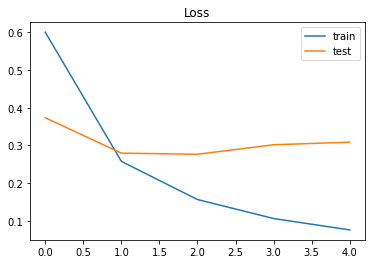

In [63]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

Show the training and the validation accuracy

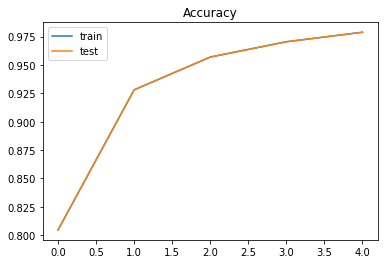

In [73]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label='test')
plt.legend()
plt.show();

Test for a random text

In [72]:
new_text = ['শফিক    তুহিনের    সুর    সংগীত    পরিচালনায়    চলচ্চিত্রের    গানে    কণ্ঠ    তাঁরই    ভাই    জাহাঙ্গীর    গতকাল    শুক্রবার    রাজধানীর    মোহাম্মদপুরের    স্টুডিওতে    গানটির    রেকর্ডিং    জাকির    হোসেন    রাজু    পরিচালিত    ছবিটির    নাম    মনের    পাইলাম    শফিক    তুহিন    গানের    ভাইয়া    ঢাকায়    আসেন    ভাইয়ার    কারণে    আমিও    একটা    সময়    নিজেকে    গানের    যুক্ত    ক্যারিয়ার    গড়তে    হতো    গানে    আজকে    সবকিছুই    ভাইয়ার    কারণেই    শফিক    তুহিন    ভাইয়া    সুর    সংগীত    পরিচালনায়    কাজ    একটা    এদিকে    শফিক    তুহিনের    ভাই    জাহাঙ্গীর    প্রথম    আলো    ডটকমকে    আসলে    গানের    জন্যই    ঢাকায়    আসা    আটটি    একক    গানের    অ্যালবাম    প্রকাশিত    গেয়েছি    মিশ্র    অ্যালবামে    ছোট    ভাইয়ের    সুর    সংগীত    পরিচালনায়    চলচ্চিত্রের    গানে    কণ্ঠ    দিলাম    টাইটেল    সংগীত    পুরো    বিষয়টি    বেশি    আনন্দের    পাশাপাশি    বেশি    আবেগও    কাজ    গানটিতে    কণ্ঠ    গাড়িতে    উঠেই    প্রথম    মাকে    ফোন    জানালাম    মিলিয়ে    আসলেই    অন্যরকম    অনুভূতি    এবারের    সিটিসেল    চ্যানেল    সংগীত    পুরস্কারে    শফিক    তুহিন    সেরা    গীতিকারের    পুরস্কার    অর্জন    একক    গানের    অ্যালবাম    পাগলামি    তুহিন    পুরস্কার    পান  ']
seq = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['sports','international','state','entertainment','economy','education','technology']
print(pred, labels[np.argmax(pred)])

[[3.1437859e-04 2.4078233e-04 9.9337316e-01 2.9836197e-03 3.3749116e-04
  2.4859849e-03 2.6462073e-04]] state
